In [2]:
import torch
from torch import nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset , DataLoader
import pandas as pd

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,X,Y
0,3.745401,8.664897
1,9.507143,19.416271
2,7.319939,15.823400
3,5.986585,8.998032
4,1.560186,3.681029
...,...,...
95,4.937956,9.244291
96,5.227328,11.300453
97,4.275410,10.233124
98,0.254191,2.061764


In [5]:
x = df.drop("Y" , axis = 1).values.reshape(-1,1)
y = df.drop("X" , axis = 1).values.reshape(-1,1)

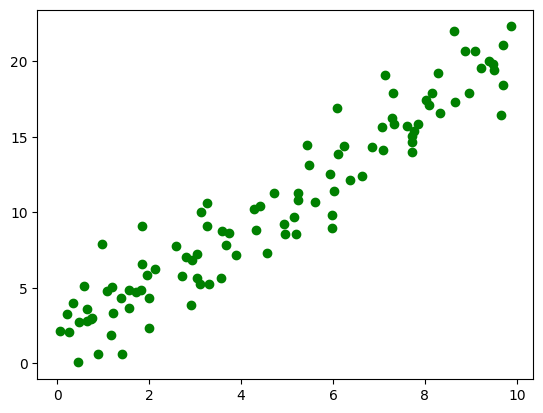

In [6]:
plt.scatter(x,y,color = "green")
plt.show()

In [7]:
x = torch.tensor(x , dtype = torch.float32)
y = torch.tensor(y , dtype = torch.float32)

In [8]:
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self , x):
        y_hat = self.linear(x)
        return y_hat

model = Linear_Regression()
model

Linear_Regression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

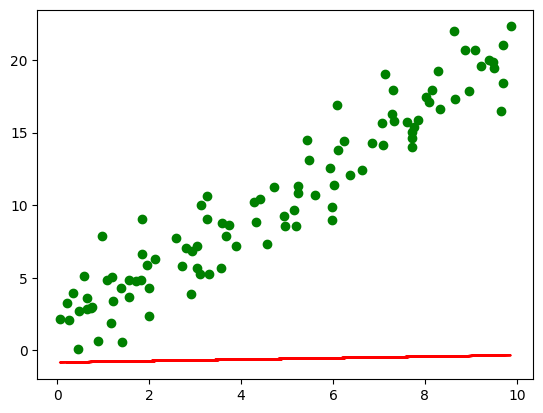

In [9]:
y_hat = model(x)
plt.scatter(x,y , color = "green")
plt.plot(x , y_hat.detach().numpy() , color = "red")
plt.show()

In [10]:
loss_fu = nn.MSELoss()
loss_fu

MSELoss()

In [11]:
opt = SGD(model.parameters() , lr = 0.01)
opt

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [12]:
set_data = TensorDataset(x,y)
dataloader = DataLoader(set_data , batch_size = 12)

In [13]:
from tqdm import tqdm
epochs = 1000
for i in tqdm(range(epochs)):
    for inputs , outputs in dataloader:
        opt.zero_grad()
        y_hat = model(inputs)
        loss = loss_fu(y_hat , outputs)
        loss.backward()
        opt.step()

100%|██████████| 1000/1000 [00:02<00:00, 365.03it/s]


In [14]:
model.eval()
with torch.no_grad():
    predicted = model(x).detach().numpy()

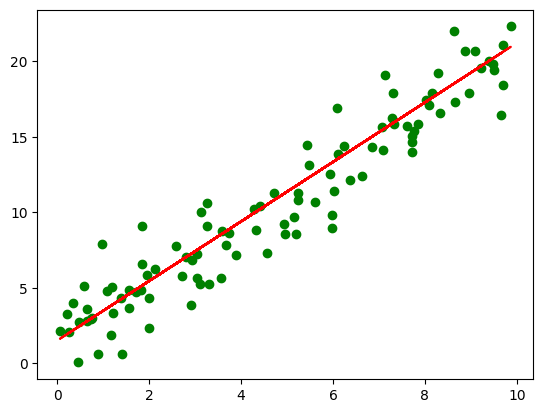

In [15]:
plt.scatter(x,y , color = "green")
plt.plot(x,predicted , color = "red")
plt.show()